### Importing the libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [71]:
import plotly.io as pio
pio.renderers.default = "svg"

### Loading the data

In [72]:
df = pd.read_csv("C:\\Users\\gdeep\\Downloads\\cereal.csv")

### Data Cleaning

In [73]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [74]:
df.shape

(77, 16)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [76]:
#checking missing values

df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

#### There are no missing values in the dataset

In [77]:
#checking duplicates

df.duplicated().sum()

0

#### There are no duplicates in the dataset

In [78]:
discrete_df = df.select_dtypes(include=["object"])

numerical_df = df.select_dtypes(include=["int64","float64"])

In [79]:
#checking for negative values

(numerical_df < 0).sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

#### There are negative values in carbo,sugars and potass columns.

In [80]:
df = df[(df['carbo']>0) & (df['sugars']>0) & (df['potass']>0)]

df.shape

(68, 16)

In [81]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,110.441176,2.514706,1.088235,174.632353,2.000000,14.764706,7.735294,96.176471,31.250000,2.235294,1.050735,0.822941,39.743161
std,15.875808,1.085765,1.003506,73.053426,2.029631,3.838601,3.972358,67.054876,21.758083,0.812544,0.127224,0.238497,10.846888
min,70.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,20.000000,0.000000,1.000000,1.000000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,140.000000,0.000000,12.000000,3.750000,40.000000,25.000000,2.000000,1.000000,0.670000,31.384493
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.500000,90.000000,25.000000,2.000000,1.000000,0.750000,39.250156
75%,120.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,46.718044
max,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,68.402973


### Univariate Statistical Analysis

In [82]:
def discrete_univariate_analysis(discrete_df):
    for col in discrete_df:
        print("*"*10,col,"*"*10)
        print(discrete_df[col].agg(["count","unique","nunique"]))
        print(discrete_df[col].value_counts())
        print()

In [83]:
discrete_univariate_analysis(discrete_df)

********** name **********
count                                                     77
unique     [100% Bran, 100% Natural Bran, All-Bran, All-B...
nunique                                                   77
Name: name, dtype: object
100% Bran                    1
Nutri-Grain Almond-Raisin    1
Quaker Oat Squares           1
Puffed Wheat                 1
Puffed Rice                  1
                            ..
Frosted Flakes               1
Froot Loops                  1
Double Chex                  1
Crispy Wheat & Raisins       1
Wheaties Honey Gold          1
Name: name, Length: 77, dtype: int64

********** mfr **********
count                         77
unique     [N, Q, K, R, G, P, A]
nunique                        7
Name: mfr, dtype: object
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

********** type **********
count          77
unique     [C, H]
nunique         2
Name: type, dtype: object
C    74
H     3
Name: type, dtype: int64



### Univariate Visual Analysis

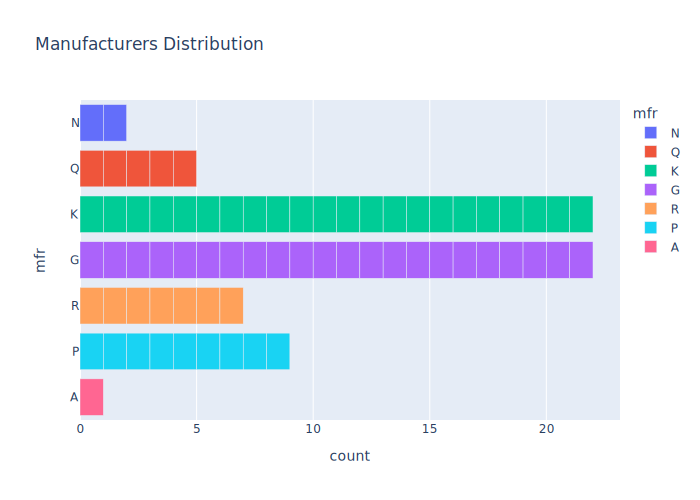

In [84]:
fig = px.bar(df,y="mfr",color="mfr",title='Manufacturers Distribution')

fig.show()

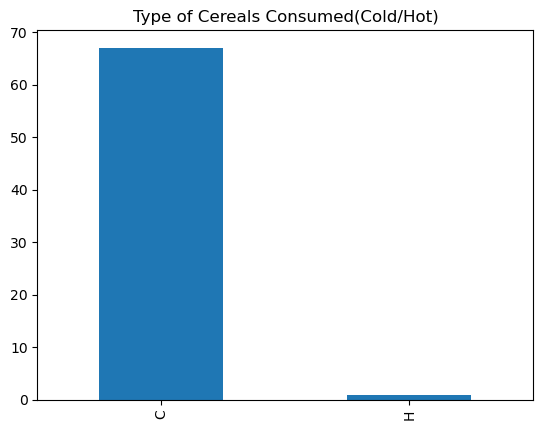

In [85]:
plt.title("Type of Cereals Consumed(Cold/Hot)")

df['type'].value_counts().plot(kind='bar')

plt.show()

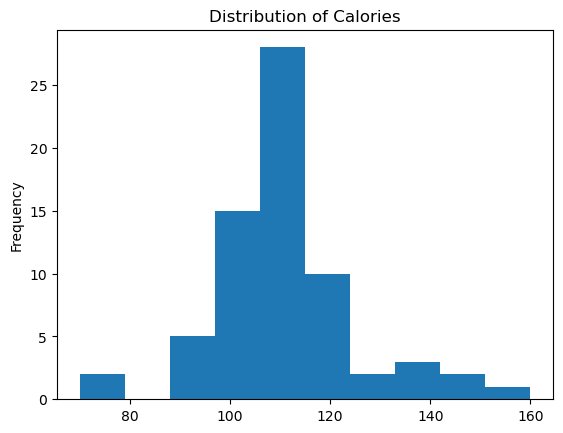

In [86]:
plt.title("Distribution of Calories")

df['calories'].plot(kind='hist')

plt.show()

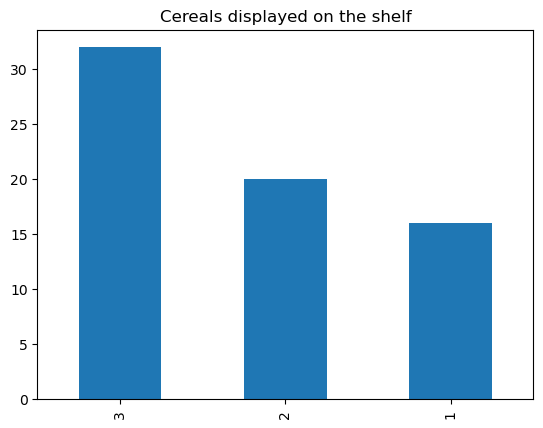

In [87]:
df['shelf'].value_counts().plot(kind='bar')

plt.title("Cereals displayed on the shelf")

plt.show()

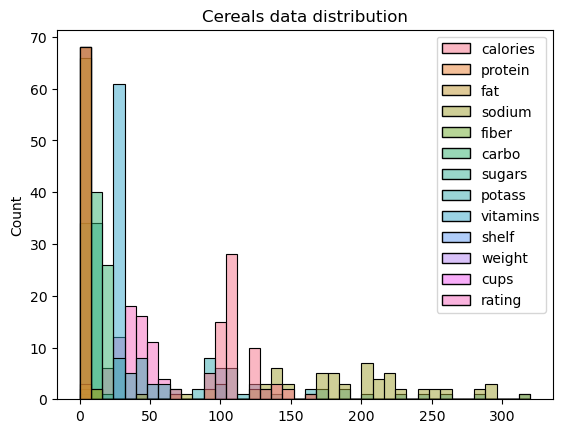

In [88]:
plt.title("Cereals data distribution")

sns.histplot(data=df)

plt.show()

### BIvariate Visual Analysis

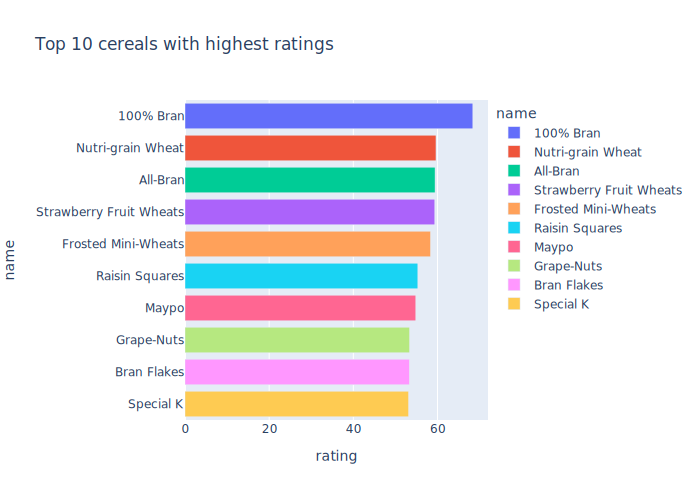

In [89]:
#Top 10 cereals with highest ratings

cereal_ratings = df.sort_values(by='rating',ascending=False)

top_10 = cereal_ratings.head(10)

fig = px.bar(top_10,x='rating',y='name',color='name',
             title='Top 10 cereals with highest ratings')

fig.show()

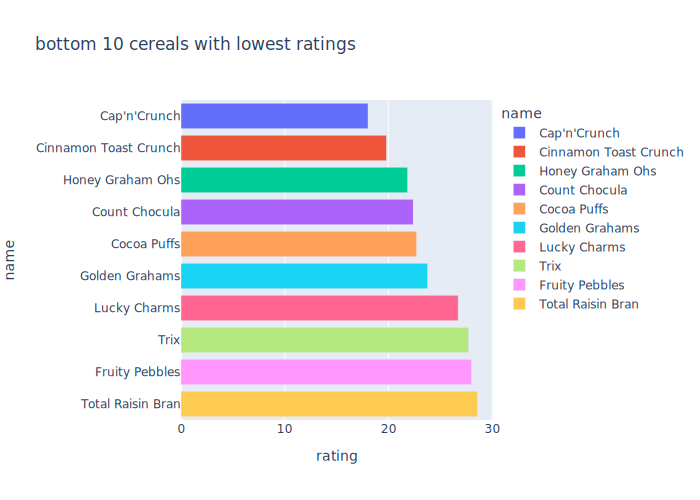

In [90]:
#bottom 10 cereals with lowest ratings

cereal_ratings = df.sort_values(by='rating')

bottom_10 = cereal_ratings.head(10)

fig = px.bar(bottom_10,x='rating',y='name',color='name',
             title='bottom 10 cereals with lowest ratings')

fig.show()

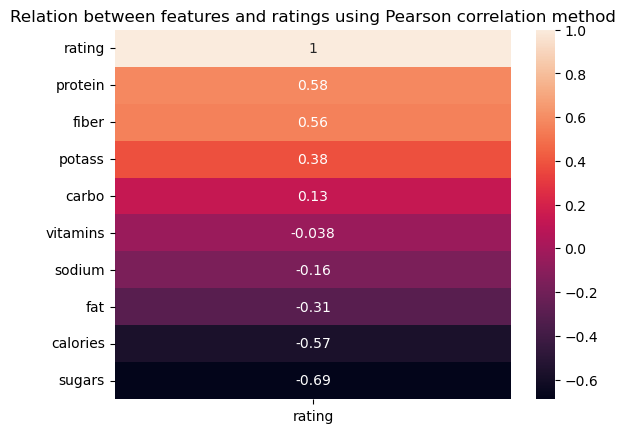

In [91]:
features = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']].copy()

correlation = features.corr(method = 'pearson')

sns.heatmap(correlation[['rating']].sort_values(by='rating', ascending=False),annot=True)

plt.title("Relation between features and ratings using Pearson correlation method")

plt.show()

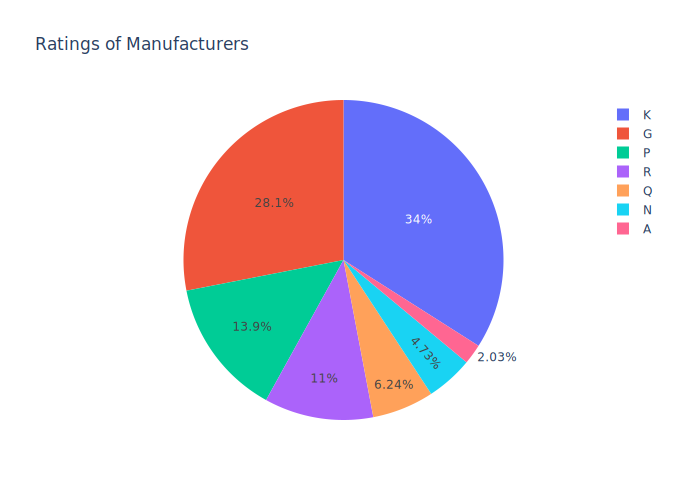

In [92]:
fig = px.pie(df, values='rating', names='mfr',title="Ratings of Manufacturers")

fig.show()

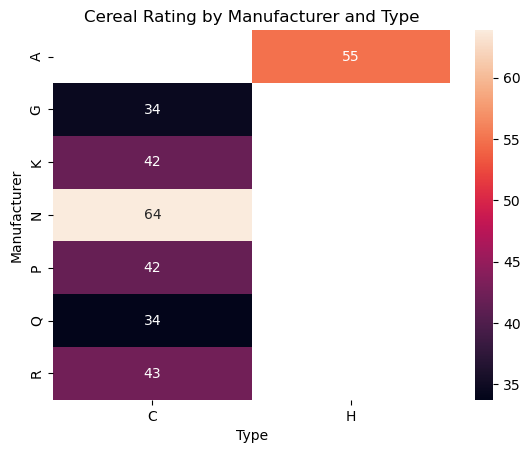

In [93]:
pivot_table = df.pivot_table(values='rating', index='mfr', columns='type')

# Create the heatmap using seaborn
sns.heatmap(pivot_table, annot=True)

# Set the plot title and labels
plt.title('Cereal Rating by Manufacturer and Type')
plt.xlabel('Type')
plt.ylabel('Manufacturer')

# Display the heatmap
plt.show()

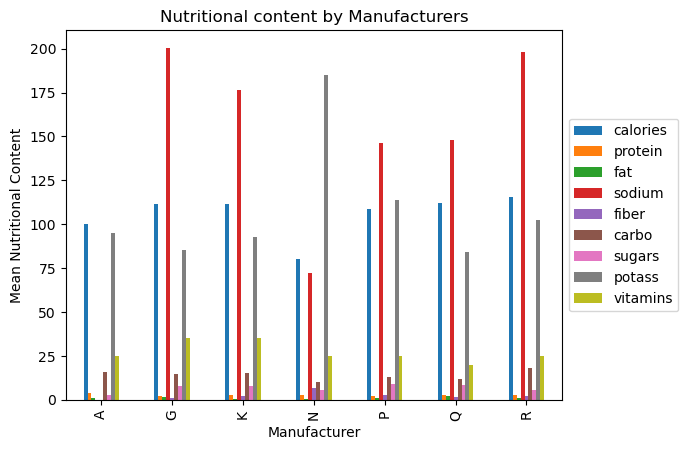

In [94]:
nutritional_content = df.groupby('mfr')[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].mean()

fig = nutritional_content.plot(kind='bar')

plt.xlabel("Manufacturer")

plt.ylabel("Mean Nutritional Content")

plt.title("Nutritional content by Manufacturers")

fig.legend(nutritional_content, loc='center left', bbox_to_anchor=(1, 0.5))


### Conclusions:
    1. Large number of cereals are manufactured by K and G
    2. Cold type of cereals are mostly manufactured and consumed
    3. Distribution of calories is between 100 to 120

#### Based on the observations, 
Rating of the cereals directly depends on the protein, fiber and potass content. The more the protein, fiber and potass content in the cereal, the higher the rating. 
Most consumers are not preferring lot of sugars, fat, sodium content and calories in the cereals.The more the sugars, fat, sodium content and calories, the lesser the rating.

Manufactures K and G have the highest ratings of 34% and 28.1% respectively.

From the analysis, 
we can say that the nutritional content varies from manufacturer to manufacturer.
There are high levels of sodium content in the cereals. G and R manufacturers have particularly heavy sodium content.